In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices

#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img



In [4]:
tr = scipy.io.loadmat('train.mat')
newt=tr["train_images"].transpose()

In [12]:
train_matrix=np.empty((60000,28,28))
for i in range(0,28):
    for j in range(0,28):
        for k in range(0,60000):
            train_matrix[k][j][i]=newt[k][i][j]

In [7]:
#Can be changed to the file name
testdata = scipy.io.loadmat('test.mat')

In [10]:
testset=testdata["test_images"]

In [13]:
test_matrix=np.empty((10000,28,28))
for i in range(0,28):
    for j in range(0,28):
        for k in range(0,10000):
            test_matrix[k][j][i]=testset[k][i][j]

In [21]:
test=test_matrix.reshape(10000,784)
a=train_matrix.reshape(60000,784)
y=tr["train_labels"].flatten()

In [22]:
from sklearn.utils import shuffle
a, y = shuffle(a, y, random_state=0)

In [23]:
training_im = a[10000:]
validation_images = a[:10000]
validation_labels=y[:10000]
training_labels=y[10000:]

In [25]:
from sklearn import svm, datasets

In [26]:
#100 training data
ssx1=training_im[:100]
ssy1=training_labels[:100]
svc1 = svm.SVC(kernel='linear').fit(ssx1, ssy1)
pred1=svc1.predict(validation_images)
b1=benchmark(pred1,validation_labels)[0]
b1

0.33689999999999998

In [27]:
#200 training data
ssx2=training_im[100:300]
ssy2=training_labels[100:300]
svc2 = svm.SVC(kernel='linear').fit(ssx2, ssy2)
pred2=svc2.predict(validation_images)
b2=benchmark(pred2,validation_labels)[0]
b2

0.25800000000000001

In [28]:
#500 training data
ssx3=training_im[300:800]
ssy3=training_labels[300:800]
svc3 = svm.SVC(kernel='linear').fit(ssx3, ssy3)
pred3=svc3.predict(validation_images)
b3=benchmark(pred3,validation_labels)[0]
b3

0.184

In [29]:
#1000 training data
ssx4=training_im[1000:2000]
ssy4=training_labels[1000:2000]
svc4 = svm.SVC(kernel='linear').fit(ssx4, ssy4)
pred4=svc4.predict(validation_images)
b4=benchmark(pred4,validation_labels)[0]
b4

0.16589999999999999

In [30]:
#2000 training data
ssx5=training_im[2000:4000]
ssy5=training_labels[2000:4000]
svc5 = svm.SVC(kernel='linear').fit(ssx5, ssy5)
pred5=svc5.predict(validation_images)
b5=benchmark(pred5,validation_labels)[0]
b5

0.1406

In [31]:
#5000 training data
ssx6=training_im[4000:9000]
ssy6=training_labels[4000:9000]
svc6 = svm.SVC(kernel='linear').fit(ssx6, ssy6)
pred6=svc6.predict(validation_images)
b6=benchmark(pred6,validation_labels)[0]
b6

0.1368

In [32]:
#10000 training data
ssx7=a[10000:20000]
ssy7=y[10000:20000]
svc7 = svm.SVC(kernel='linear').fit(ssx7, ssy7)
pred7=svc7.predict(validation_images)
b7=benchmark(pred7,validation_labels)[0]
b7

0.1358

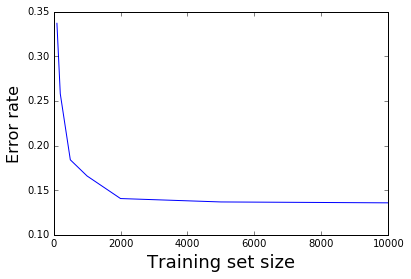

In [33]:
plt.plot([10000, 5000, 2000, 1000,500,200,100],[b7, b6, b5, b4,b3,b2,b1])
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Error rate', fontsize=16)

In [34]:
from sklearn import metrics as mt

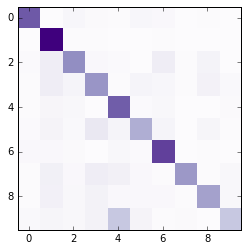

In [35]:
#100 dataset
cm1=mt.confusion_matrix(validation_labels,pred1,labels=None)
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Purples)

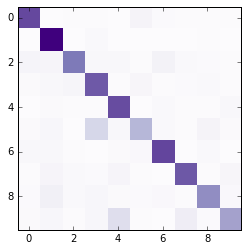

In [36]:
#200 dataset
cm2=mt.confusion_matrix(validation_labels,pred2,labels=None)
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Purples)

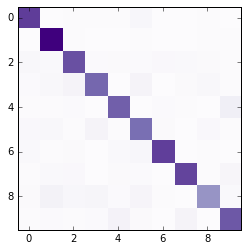

In [37]:
#500 dataset
cm3=mt.confusion_matrix(validation_labels,pred3,labels=None)
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Purples)

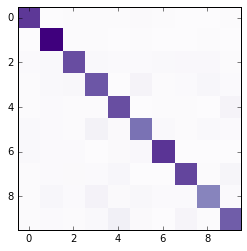

In [38]:
#1000 dataset
cm4=mt.confusion_matrix(validation_labels,pred4,labels=None)
plt.imshow(cm4, interpolation='nearest', cmap=plt.cm.Purples)

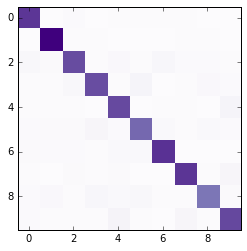

In [39]:
#2000 dataset
cm5=mt.confusion_matrix(validation_labels,pred5,labels=None)
plt.imshow(cm5, interpolation='nearest', cmap=plt.cm.Purples)

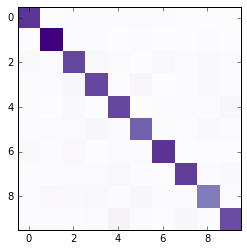

In [40]:
#5000 dataset
cm6=mt.confusion_matrix(validation_labels,pred6,labels=None)
plt.imshow(cm6, interpolation='nearest', cmap=plt.cm.Purples)

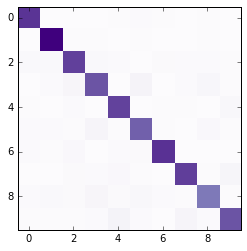

In [41]:
#10000 dataset
cm7=mt.confusion_matrix(validation_labels,pred7,labels=None)
plt.imshow(cm7, interpolation='nearest', cmap=plt.cm.Purples)

In [42]:
#Cross-Validation
folds = 10
subset_size = int(len(ssx7)/folds)

In [49]:
#Optimal C search
b=[0]*10
for i in range(0,10):
    validation = ssx7[i*subset_size:(i+1)*subset_size]
    labelv = ssy7[i*subset_size:(i+1)*subset_size]
    training = np.concatenate((ssx7[:i*subset_size],ssx7[(i+1)*subset_size:]))
    labelt = np.concatenate((ssy7[:i*subset_size],ssy7[(i+1)*subset_size:]))
    svcx = svm.SVC(kernel='linear',C=pow(10,i-4)).fit(training, labelt)
    predx = svcx.predict(validation)
    b[i]=benchmark(predx,labelv)[0]
    print("Error rate:", b[i], " C value:", pow(10,i-4))

0.133  C value: 0.0001
0.143  C value: 0.001
0.133  C value: 0.01
0.123  C value: 0.1
0.126  C value: 1
0.129  C value: 10
0.116  C value: 100
0.146  C value: 1000
0.124  C value: 10000
0.123  C value: 100000


In [51]:
#Cross-Validation on optimal C
for i in range(0,10):
    validation = ssx7[i*subset_size:(i+1)*subset_size]
    labelv = ssy7[i*subset_size:(i+1)*subset_size]
    training = np.concatenate((ssx7[:i*subset_size],ssx7[(i+1)*subset_size:]))
    labelt = np.concatenate((ssy7[:i*subset_size],ssy7[(i+1)*subset_size:]))
    svcx = svm.SVC(kernel='linear',C=100).fit(training, labelt)
    predx = svcx.predict(validation)
    b[i]=benchmark(predx,labelv)[0]
    print("Error rate:",b[i])

Error rate: 0.133
Error rate: 0.143
Error rate: 0.133
Error rate: 0.123
Error rate: 0.126
Error rate: 0.129
Error rate: 0.116
Error rate: 0.146
Error rate: 0.124
Error rate: 0.123


In [52]:
average=sum(b)/len(b)
average

0.12959999999999999

In [53]:
pred_test = svcx.predict(test)

In [59]:
numpy.savetxt("HW1-Agrima.csv", pred_test, delimiter=",")

NameError: name 'c' is not defined

SyntaxError: invalid syntax (<ipython-input-2-cb5032a5ec07>, line 1)

SyntaxError: invalid syntax (<ipython-input-3-c5fb5fabe56c>, line 1)